In [1]:
import project1 as p1
import utils
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation, digits
import main

In [2]:
train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


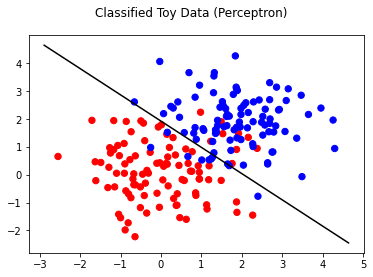

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


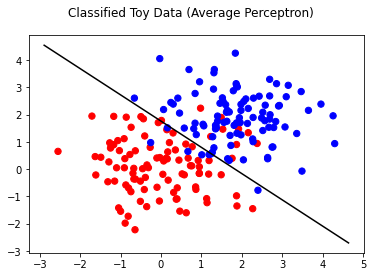

theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is -1.2195071848898564


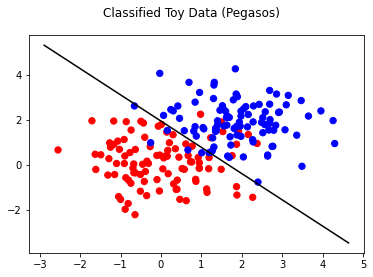

In [3]:
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

T = 10
L = 0.2

thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

### ACCURACY

In [4]:
T = 10
L = 0.01

In [5]:
pct_train_accuracy, pct_val_accuracy = \
    p1.classifier_accuracy(p1.perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

Training accuracy for perceptron:   0.8157
Validation accuracy for perceptron: 0.7160


In [6]:
avg_pct_train_accuracy, avg_pct_val_accuracy = \
    p1.classifier_accuracy(p1.average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

Training accuracy for average perceptron:   0.9728
Validation accuracy for average perceptron: 0.7980


In [7]:
avg_peg_train_accuracy, avg_peg_val_accuracy = \
    p1.classifier_accuracy(p1.pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))

Training accuracy for Pegasos:                     0.9143
Validation accuracy for Pegasos:                   0.7900


### PARAMETER TUNING

In [8]:
data = (train_bow_features, train_labels, val_bow_features, val_labels)

In [9]:
#values of lambda
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

In [10]:
pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

perceptron valid: [(1, 0.758), (5, 0.72), (10, 0.716), (15, 0.778), (25, 0.794), (50, 0.79)]
best = 0.7940, T=25.0000


In [11]:
avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

avg perceptron valid: [(1, 0.794), (5, 0.792), (10, 0.798), (15, 0.798), (25, 0.8), (50, 0.796)]
best = 0.8000, T=25.0000


In [12]:
# # fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))


Pegasos valid: tune T [(1, 0.786), (5, 0.78), (10, 0.79), (15, 0.802), (25, 0.806), (50, 0.8)]
best = 0.8060, T=25.0000


In [13]:
fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))


Pegasos valid: tune L [(0.001, 0.786), (0.01, 0.806), (0.1, 0.762), (1, 0.568), (10, 0.518)]
best = 0.8060, L=0.0100


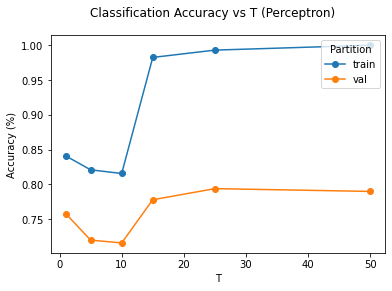

In [14]:
utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)

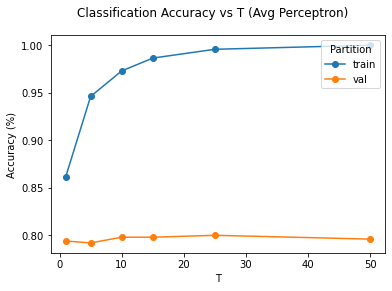

In [15]:
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)

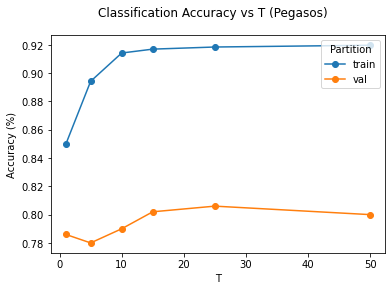

In [16]:
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)

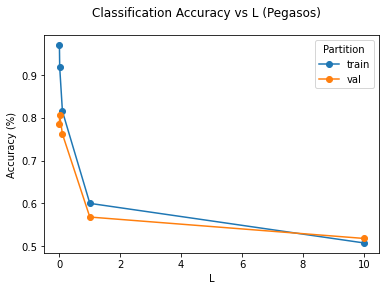

In [17]:
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

In [18]:
# best_theta = None # Your code here
# wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
# sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
# print("Most Explanatory Word Features")
# print(sorted_word_features[:10])

### BEST TEST ACCURACY
### PEGASOS ALONG WITH HYPER-PARAMETERS (T=25, L=0.01)

In [19]:
T = 25
L = 0.01
avg_peg_train_accuracy, avg_peg_test_accuracy = p1.classifier_accuracy(p1.pegasos, train_bow_features,test_bow_features, train_labels,
                                                                       test_labels, T=T, L=L)

In [20]:
print("{:50} {:.4f}".format("Best Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Best Testing accuracy for Pegasos:", avg_peg_test_accuracy))

Best Training accuracy for Pegasos:                0.9185
Best Testing accuracy for Pegasos:                 0.8020


### MOST EXPLANATORY FEATURES
Assigning to best_theta, the weights (and not the bias!) learned by the Pegasos algorithm with the optimal choice of hyper-parameters (T = 25, L = 0.01).

In [21]:
best_theta = p1.pegasos(train_bow_features, train_labels, T, L)[0]

In [22]:
wordlist = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)

In [23]:
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

Most Explanatory Word Features
['delicious', 'great', '!', 'best', 'perfect', 'loves', 'wonderful', 'glad', 'love', 'quickly']


### FEATURE ENGINEERING

In [24]:
"""
def extract_words(input_string):
    
    for c in punctuation + digits:
        input_string = input_string.replace(c, ' ' + c + ' ')

    return input_string.lower().split()
"""
stop_words = np.loadtxt('stopwords.txt', dtype=str)
print (stop_words)
def extract_words(stop_words):
    for word in stop_words:
        word_list = stop_words.tolist()
        return word_list
        #np.extract(word,stop_words)
        #return set([word for word in stop_words.split('')])
print (extract_words(stop_words))
    

['i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' 'your' 'yours'
 'yourself' 'yourselves' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers'
 'herself' 'it' 'its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'
 'what' 'which' 'who' 'whom' 'this' 'that' 'these' 'those' 'am' 'is' 'are'
 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does'
 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until'
 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into'
 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up'
 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then'
 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both'
 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only'
 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don'
 'should' 'now']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves'

In [25]:
texts = extract_words(stop_words)

In [26]:

def bag_of_words(texts):
    """
    Inputs a list of string reviews
    Returns a dictionary of unique unigrams occurring over the input
    Feel free to change this code as guided by Problem 9
    """
    with open("stopwords.txt",'r',encoding='utf8') as stoptext:
        stop_words = stoptext.read()
        stop_words = stop_words.replace("\n"," ").split()
        
    dictionary = {} # maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if word not in dictionary and word not in stop_words:
                dictionary[word] = len(dictionary)
    return dictionary
    

In [27]:
T = 25
L = 0.01
avg_peg_train_accuracy, avg_peg_test_accuracy = p1.classifier_accuracy(p1.pegasos, train_bow_features,test_bow_features, train_labels,
                                                                       test_labels, T=T, L=L)
print("{:50} {:.4f}".format("Best Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Best Testing accuracy for Pegasos:", avg_peg_test_accuracy))

Best Training accuracy for Pegasos:                0.9185
Best Testing accuracy for Pegasos:                 0.8020


In [28]:
def extract_bow_feature_vectors(reviews, dictionary):
    """
    Inputs a list of string reviews
    Inputs the dictionary of words as given by bag_of_words
    Returns the bag-of-words feature matrix representation of the data.
    The returned matrix is of shape (n, m), where n is the number of reviews
    and m the total number of entries in the dictionary.
    Feel free to change this code as guided by Problem 9
    """
    # Your code here

    num_reviews = len(reviews)
    feature_matrix = np.zeros([num_reviews, len(dictionary)])

    for i, text in enumerate(reviews):
        word_list = extract_words(text)
        for word in word_list:
            if word in dictionary:
                feature_matrix[i, dictionary[word]] = 1
    return feature_matrix

In [30]:
def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the percentage and number of correct predictions.
    """
    return (preds == targets).mean()